In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from scipy.stats import norm
from sklearn.mixture import GaussianMixture

In [3]:
# auxiliary to simplify normal distributions
def ndi(mu,sd,n):
    b=np.random.normal(mu,sd,n)
    return(b)

# Simulation parameter for data

In [9]:
# no of Gaussian distributions
n_dist= 4

# mean values
mu=list(df["mean declination"][(df["number elements"] > 3) & (df["sigma declination"]< 10)])
# std. variations
sd=list(df["sigma declination"][(df["number elements"] > 3) & (df["sigma declination"]< 10)])
noise_bmg = 0.5
n=100

# mixed 
a = tuple([ndi(mu[i],sd,n) for i in range(n_dist)])
bmg=np.concatenate(a)
data = np.random.normal(bmg, noise_bmg)[:, np.newaxis]

NameError: name 'df' is not defined

## Ploting mixed distribution

(array([0.03290971, 0.05923748, 0.00658194, 0.05735693, 0.03573055,
        0.07240137, 0.01786527, 0.        , 0.02726805, 0.0667597 ]),
 array([ 5.14489083,  7.8036803 , 10.46246977, 13.12125923, 15.7800487 ,
        18.43883817, 21.09762763, 23.7564171 , 26.41520656, 29.07399603,
        31.7327855 ]),
 <a list of 10 Patch objects>)

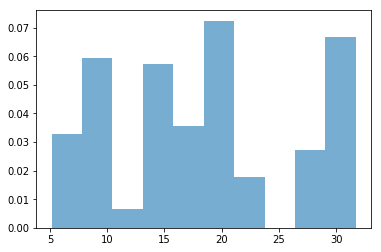

In [8]:
plt.hist(data, bins='auto', alpha=.6, density=True)

In [31]:
gmm = GaussianMixture(n_components=n_dist, covariance_type='spherical')
gmm.fit(data)

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=4, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

In [32]:
for i in np.arange(n_dist):
    mu=gmm.means_[i,0]
    var=gmm.covariances_[i]
    wei=gmm.weights_[i]
    print(mu, var, wei)

14.85299332502424 1.301514119720795 0.250837037701527
29.884173524976053 1.1250468075528512 0.2500000028983315
8.374252266127888 1.353449232037195 0.24867950763870605
20.083375434538155 0.8934396733296833 0.25048345176143544


Text(0.5, 1.0, 'Gaussian Mixture Model')

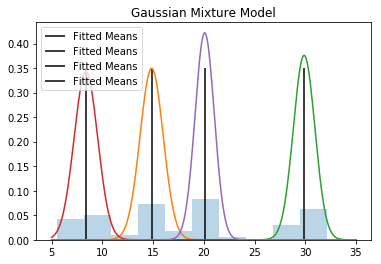

In [33]:
# make X axis for plots
x = np.linspace(5, 35, 3 * n + 1)

plt.hist(data, bins='auto', alpha=.3, density=True)

for i in np.arange(n_dist):
    mu=gmm.means_[i,0]
    var=gmm.covariances_[i]
    plt.vlines(mu, ymin=0, ymax=0.35, label='Fitted Means')
    plt.plot(x, norm.pdf(x, mu, np.sqrt(var)))
plt.legend()
plt.title('Gaussian Mixture Model')

# How many components?
The fact that GMM is a generative model gives us a natural means of determining the optimal number of components for a given dataset. A generative model is inherently a probability distribution for the dataset, and so we can simply evaluate the likelihood of the data under the model, using cross-validation to avoid over-fitting. Another means of correcting for over-fitting is to adjust the model likelihoods using some analytic criterion such as the Akaike information criterion (AIC) or the Bayesian information criterion (BIC). Scikit-Learn's GMM estimator actually includes built-in methods that compute both of these, and so it is very easy to operate on this approach.

See http://www.cs.toronto.edu/~mbrubake/teaching/C11/Handouts/BIC.pdf
for significant differences between models.

Let's look at the AIC and BIC as a function as the number of GMM components for our moon dataset:

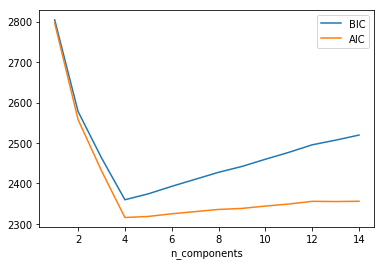

In [34]:
n_components = np.arange(1, 15)
models = [GaussianMixture(n, covariance_type='spherical', random_state=0).fit(data)
          for n in n_components]

plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

References
----------

- B.W. Silverman, “Density Estimation for Statistics and Data Analysis”
- Hastie, Tibshirani and Friedman,
  “The Elements of Statistical Learning: Data Mining, Inference,
  and Prediction”, Springer (2009)
- Liu, R., Yang, L.
  “Kernel estimation of multivariate cumulative distribution function.”
  Journal of Nonparametric Statistics (2008)

